

>MACHINE LEARNING


> 22MCA0394


> ASHISH PATEL

QUESTION )
Develop a flower classification model using “InceptionV3Net” transfer learning technique and compare the validation performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/flowers.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/iris/2246250943_b38cb07405_c.jpg  
  inflating: flowers/iris/2310777139_3f7e3698d2_c.jpg  
  inflating: flowers/iris/2310778209_854023e033_c.jpg  
  inflating: flowers/iris/2310778457_4294cf3d0f_c.jpg  
  inflating: flowers/iris/2318108086_276a6b8cdf_c.jpg  
  inflating: flowers/iris/2322854489_537f79ed46_c.jpg  
  inflating: flowers/iris/2323951884_a5d7a91f4c_c.jpg  
  inflating: flowers/iris/2328754112_b23f4e7c9f_c.jpg  
  inflating: flowers/iris/23393703622_7d7f4b1cb6_c.jpg  
  inflating: flowers/iris/2366211581_4bf9d50f80_c.jpg  
  inflating: flowers/iris/2372475031_a81fc2945b_c.jpg  
  inflating: flowers/iris/2374992658_2aac0ef4ba_c.jpg  
  inflating: flowers/iris/2398755867_56d2e547f6_c.jpg  
  inflating: flowers/iris/2411612369_cf891aca15_c.jpg  
  inflating: flowers/iris/2419589660_80b6084bfc_c.jpg  
  inflating: flowers/iris/2429129356_ea30de9ecb_c.jpg  
  inflating: flowers/iris/2429138274_506667c3ff_c.jp

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


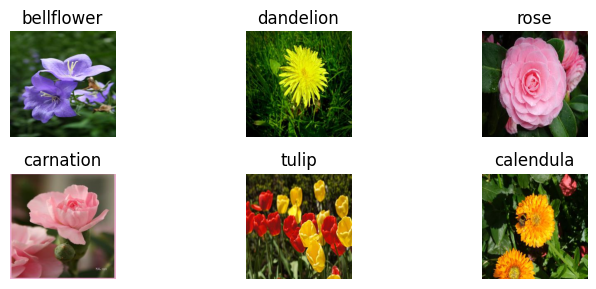

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

data_dir = '/content/flowers'

class_folders = os.listdir(data_dir)

def get_random_images(class_folder):
    class_path = os.path.join(data_dir, class_folder)
    images = os.listdir(class_path)
    random_image = random.choice(images)
    return random_image

plt.figure(figsize=(8, 3))
for i, class_folder in enumerate(class_folders[:6]):
    random_image = get_random_images(class_folder)
    img_path = os.path.join(data_dir, class_folder, random_image)
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(class_folder)
    plt.axis('off')

plt.tight_layout()
plt.show()


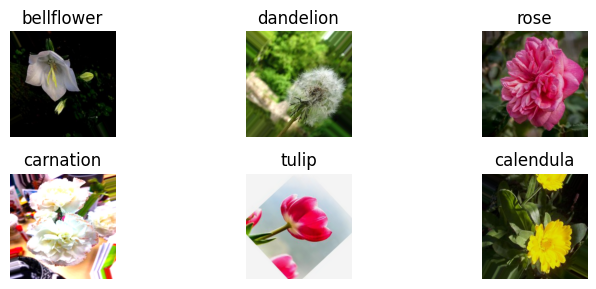

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

data_dir = '/content/flowers'

class_folders = os.listdir(data_dir)

def get_random_images(class_folder):
    class_path = os.path.join(data_dir, class_folder)
    images = os.listdir(class_path)
    random_image = random.choice(images)
    return os.path.join(class_path, random_image)

plt.figure(figsize=(8, 3))

# Data augmentation techniques
datagen = ImageDataGenerator(
   rotation_range = 50,
   fill_mode='nearest',
   brightness_range = (0.8,1.5),
   width_shift_range=1,
   height_shift_range=1,
   shear_range=0.5,
   horizontal_flip=True,
)

for i, class_folder in enumerate(class_folders[:6]):
    img_path = get_random_images(class_folder)
    img = Image.open(img_path)
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Add a batch dimension for data augmentation

    # Generate augmented images and visualize them
    augmented_images = []
    for batch in datagen.flow(img_array, batch_size=1):
        augmented_image = batch[0].astype('uint8')
        augmented_images.append(augmented_image)
        if len(augmented_images) >= 6:
            break

    for j, augmented_image in enumerate(augmented_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_image)
        plt.title(class_folder)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Load the dataset and perform data augmentation

dir = '/content/flowers'

img_height, img_width = 150, 150
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 50,
    fill_mode='nearest',
    brightness_range = (0.8,1.5),
    width_shift_range=1,
    height_shift_range=1,
    shear_range=0.5,
    horizontal_flip=True,
    validation_split = 0.2
)

train_generator = datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'validation'
)

Found 7797 images belonging to 10 classes.
Found 1942 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

input_shape = (150, 150, 3)
num_classes = 10

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [ ]:
# Train the model with data augmentation
epochs = 6 #pevious runned 12 epochs

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

Epoch 1/6
121/121 [==============================] - 86s 707ms/step - loss: 0.1764 - accuracy: 0.9408 - val_loss: 0.7267 - val_accuracy: 0.7922
Epoch 2/6
121/121 [==============================] - 83s 689ms/step - loss: 0.1625 - accuracy: 0.9478 - val_loss: 0.3827 - val_accuracy: 0.8776
Epoch 3/6
121/121 [==============================] - 83s 684ms/step - loss: 0.1595 - accuracy: 0.9466 - val_loss: 0.4063 - val_accuracy: 0.8760
Epoch 4/6
121/121 [==============================] - 83s 690ms/step - loss: 0.1469 - accuracy: 0.9516 - val_loss: 0.4577 - val_accuracy: 0.8672
Epoch 5/6
121/121 [==============================] - 76s 631ms/step - loss: 0.1573 - accuracy: 0.9461 - val_loss: 0.7340 - val_accuracy: 0.8167
Epoch 6/6
121/121 [==============================] - 83s 688ms/step - loss: 0.1393 - accuracy: 0.9531 - val_loss: 0.3893 - val_accuracy: 0.8828


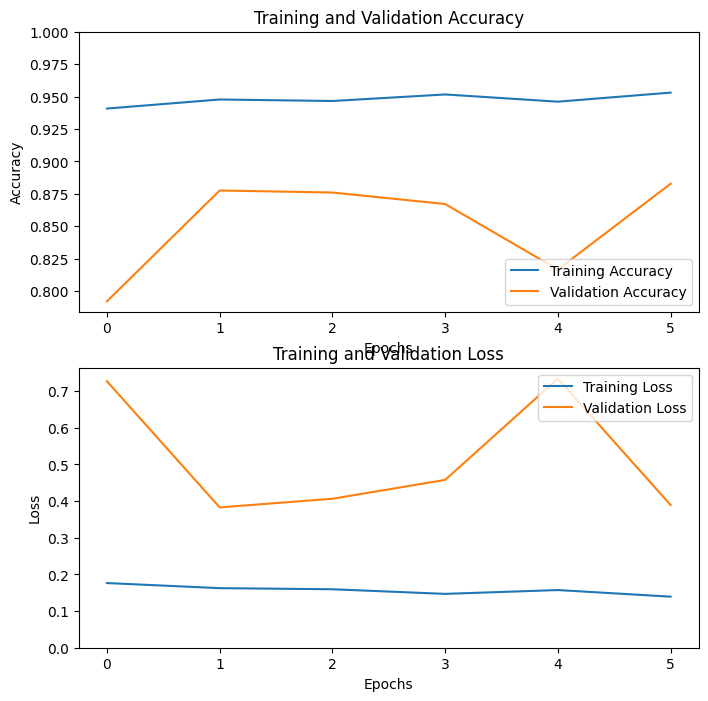

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()